In [3]:
import nipy
import scipy as sp
from scipy import stats

In [103]:
def sample_wiener(drift, threshold, ndt, delta_t=0.01):
    
    
    max_t = threshold/drift * 10 / delta_t
    
    t = np.arange(0, max_t, delta_t)
    
    drifts = sp.stats.norm.rvs(loc=drift, scale=1.0, size=len(t)) * np.sqrt(delta_t)
    
    drifts = np.concatenate((np.zeros(int(ndt*delta_t)), drifts))
    
    accumulated_evidence = np.cumsum(drifts)
    
    max_idx = np.argmax(np.abs(accumulated_evidence) > threshold)
    
    t = t[:max_idx]
    drifts = drifts[:max_idx]
    accumulated_evidence = accumulated_evidence[:max_idx]
    
    return t, drifts, accumulated_evidence
    
    

In [151]:
def simulate_experiments(mean_drift, sd_drift, threshold, ndt, onsets, dt=0.01,
                        function='drift', motor_response_duration=1):
    
    drifts = sp.stats.norm(loc=mean_drift, scale=sd_drift).rvs(size=len(onsets))
    
    hrf = nipy.modalities.fmri.hrf.spm_hrf_compat(np.arange(0, 20, dt))
    
    neural_signal = np.zeros(int((np.max(onsets) + 20) / dt))
    
    for onset, drift in zip(onsets, drifts):
        _, drifts, accumulated_evidence = sample_wiener(drift, threshold, ndt)
        
        if function == 'drift':
            neural_signal[int(onset/dt):int(onset/dt+len(drifts))] = drifts
            
        if function == 'accumulation':
            neural_signal[int(onset/dt):int(onset/dt+len(drifts))] = accumulated_evidence
            
        if function == 'time_on_task':
            neural_signal[int(onset/dt):int(onset/dt+len(drifts))] = 1
            
        if function == 'motor_response':
            neural_signal[int(onset/dt+len(drifts)):int(onset/dt+motor_reponse_duration/dt)] = 1            
    
    
    bold = np.convolve(hrf, neural_signal)
    neural_signal = np.concatenate((neural_signal, np.zeros(len(bold) - len(neural_signal))))
    
    print(bold.shape, neural_signal.shape)
    
    t = np.arange(0, len(neural_signal) * dt, dt)
    
    return t, neural_signal, bold
    

# Drift area

## low drift

(6499,) (6499,)


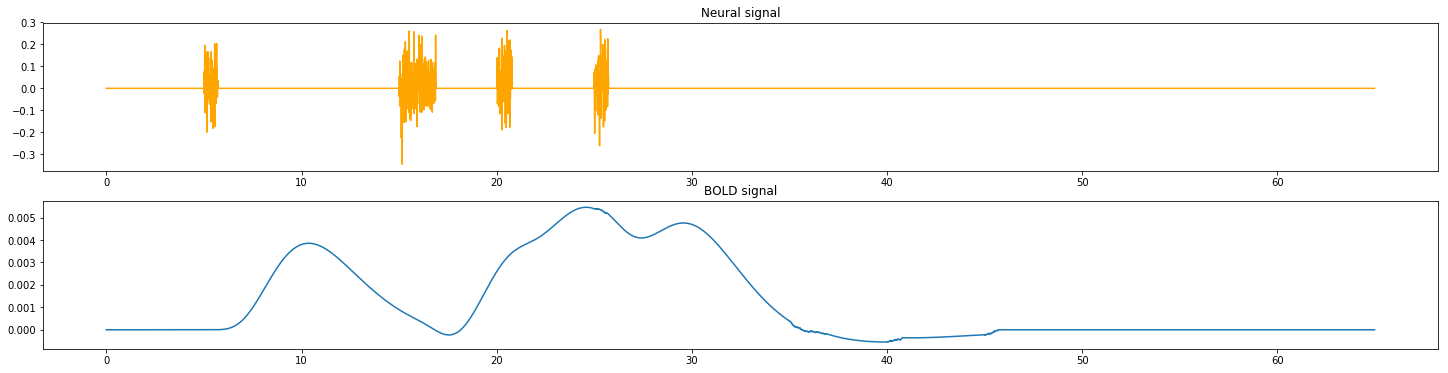

In [152]:
t, neural_signal, bold = simulate_experiments(.2, .1, 2, .2, [5, 15, 20, 25])

plt.figure(figsize=(25, 6))
plt.subplot(211)
plt.title('Neural signal')
plt.plot(t, neural_signal, color='orange')
plt.subplot(212)
plt.title('BOLD signal')
plt.plot(t, bold)

## High drift

(6499,) (6499,)


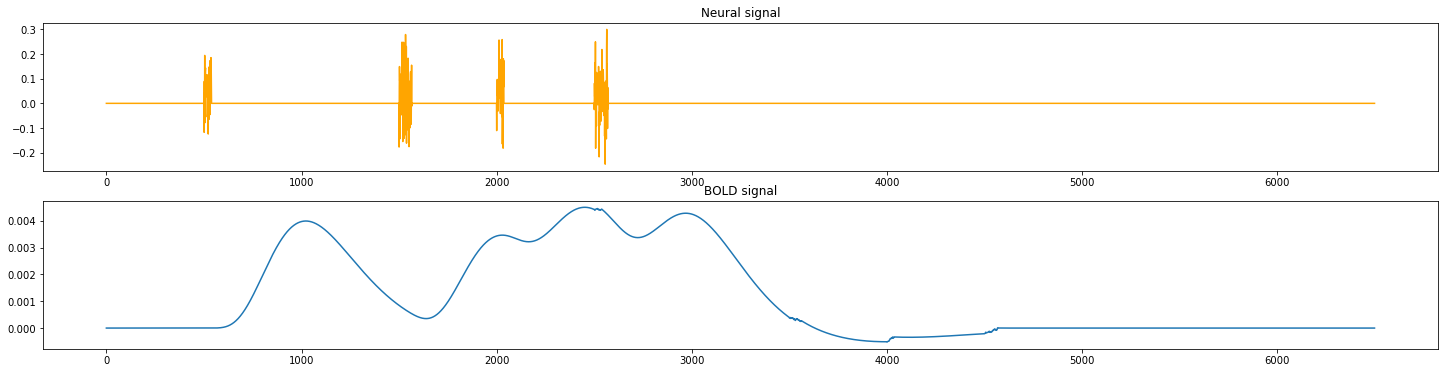

In [153]:
t, neural_signal, bold = simulate_experiments(.5, .1, 2, .2, [5, 15, 20, 25])

plt.figure(figsize=(25, 6))
plt.subplot(211)
plt.title('Neural signal')
plt.plot(neural_signal, color='orange')
plt.subplot(212)
plt.title('BOLD signal')

plt.plot(bold)

# Accumulation area

## Low drift

(6499,) (6499,)


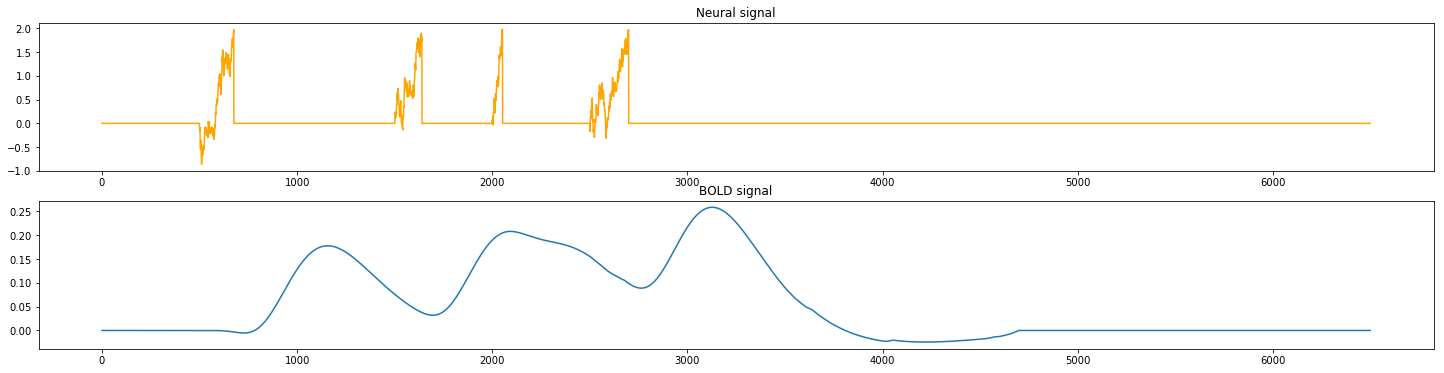

In [154]:
t, neural_signal, bold = simulate_experiments(.2, .1, 2, .2, [5, 15, 20, 25], function='accumulation')

plt.figure(figsize=(25, 6))
plt.subplot(211)
plt.title('Neural signal')
plt.plot(neural_signal, color='orange')
plt.subplot(212)
plt.title('BOLD signal')

plt.plot(bold)

## High drift

(6499,) (6499,)


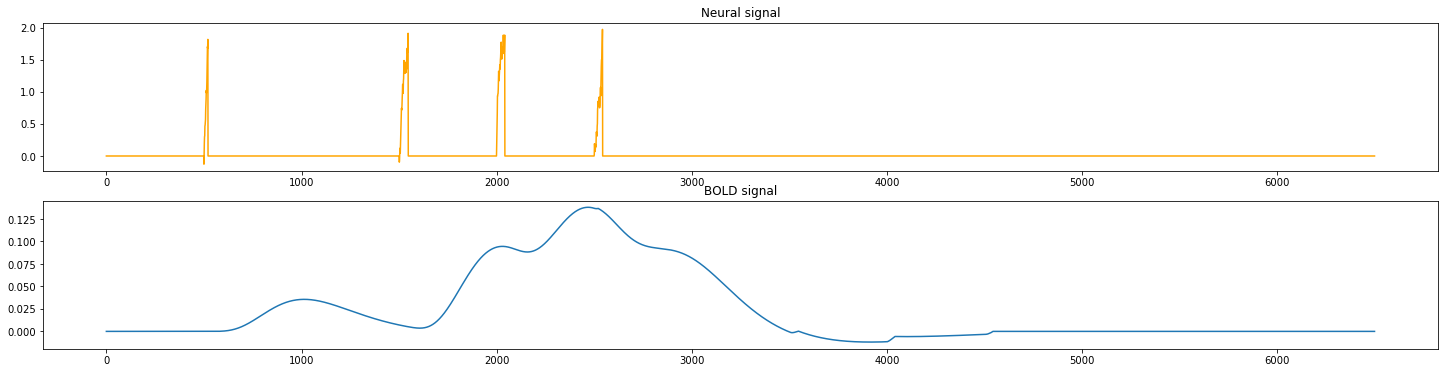

In [155]:
t, neural_signal, bold = simulate_experiments(.5, .1, 2, .2, [5, 15, 20, 25], function='accumulation')

plt.figure(figsize=(25, 6))
plt.subplot(211)
plt.title('Neural signal')
plt.plot(neural_signal, color='orange')
plt.subplot(212)
plt.title('BOLD signal')

plt.plot(bold)

## Time-on-task

## Low drift

(6499,) (6499,)


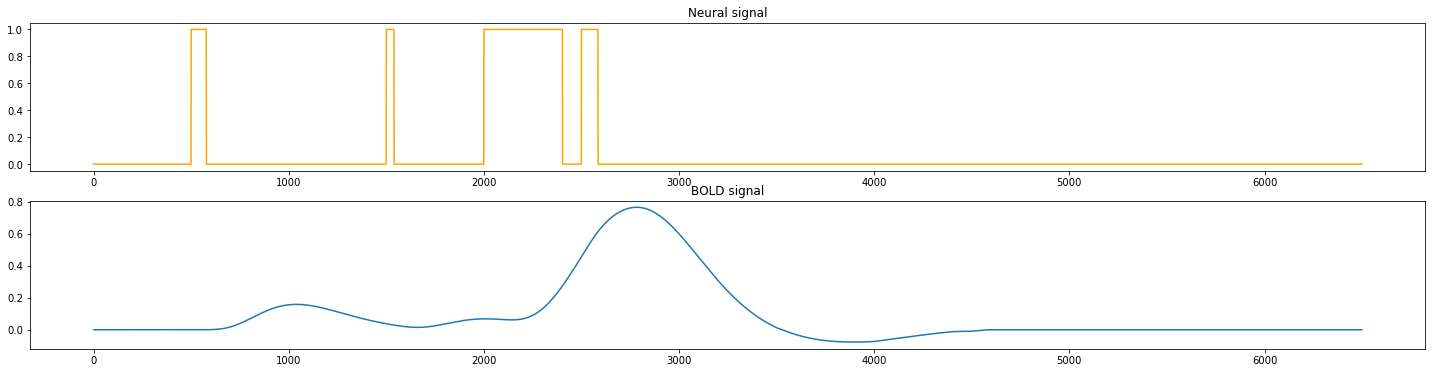

In [156]:
t, neural_signal, bold = simulate_experiments(.2, .1, 2, .2, [5, 15, 20, 25], function='time_on_task')

plt.figure(figsize=(25, 6))
plt.subplot(211)
plt.title('Neural signal')
plt.plot(neural_signal, color='orange')
plt.subplot(212)
plt.title('BOLD signal')

plt.plot(bold)

## high drift

(6499,) (6499,)


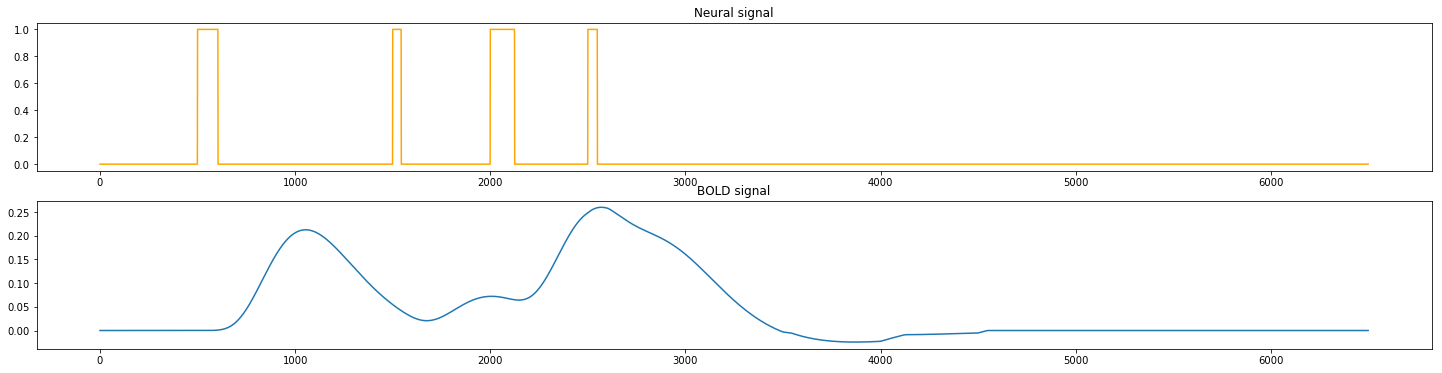

In [157]:
t, neural_signal, bold = simulate_experiments(.2, .1, 2, .2, [5, 15, 20, 25], function='time_on_task')

plt.figure(figsize=(25, 6))
plt.subplot(211)
plt.title('Neural signal')
plt.plot(neural_signal, color='orange')
plt.subplot(212)
plt.title('BOLD signal')

plt.plot(bold)